# Numpy

In [4]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros

import datetime as dt

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Tutorial

In [5]:
m = np.matrix([[1, 0, 0], 
               [1, 1, 0], 
               [0, 0, 1]])
u, s, v = np.linalg.svd(m)

In [6]:
u

matrix([[-0.52573111,  0.        , -0.85065081],
        [-0.85065081,  0.        ,  0.52573111],
        [ 0.        ,  1.        ,  0.        ]])

In [7]:
s

array([1.61803399, 1.        , 0.61803399])

In [8]:
v

matrix([[-0.85065081, -0.52573111, -0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.52573111,  0.85065081,  0.        ]])

Reconstruction matrix m

In [9]:
np.dot(u, np.dot(np.diag(s), v))

matrix([[ 1.00000000e+00, -8.51707167e-17,  0.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

### Advanced

In [10]:
a = np.random.randn(9, 6) + 1j*np.random.randn(9, 6)
b = np.random.randn(2, 7, 8, 3) + 1j*np.random.randn(2, 7, 8, 3)

In [11]:
u, s, vh = np.linalg.svd(a, full_matrices=True)

np.allclose(a, np.dot(u[:, :6] * s, vh))

smat = np.zeros((9, 6), dtype=complex)
smat[:6, :6] = np.diag(s)
np.allclose(a, np.dot(u, np.dot(smat, vh)))

True

round -> 반올림

In [12]:
X = np.random.random((5, 8))
X = X.round(2)

In [13]:
X_0mean = X - X.mean(0)
X_0mean.round(2)

array([[ 0.29, -0.09, -0.2 ,  0.08, -0.42,  0.11,  0.25, -0.29],
       [-0.18,  0.1 , -0.63,  0.09,  0.25, -0.02,  0.32,  0.16],
       [ 0.33,  0.23,  0.22,  0.13, -0.38,  0.28, -0.07,  0.21],
       [-0.31, -0.32,  0.33, -0.25,  0.39, -0.36, -0.14, -0.44],
       [-0.13,  0.09,  0.3 , -0.05,  0.15, -0.02, -0.37,  0.34]])

In [14]:
U, s, Vh = svd(X_0mean, full_matrices=False)

In [15]:
U

array([[-0.40192662,  0.15686113, -0.61816433,  0.48137557,  0.4472136 ],
       [-0.13870474,  0.73025986,  0.46828767, -0.16789339,  0.4472136 ],
       [-0.43990201, -0.50660557,  0.02070119, -0.59110784,  0.4472136 ],
       [ 0.75950576,  0.04751312, -0.3768915 , -0.28079585,  0.4472136 ],
       [ 0.22102762, -0.42802854,  0.50606697,  0.55842151,  0.4472136 ]])

In [16]:
s

array([1.15550623e+00, 9.55803140e-01, 7.79542509e-01, 1.09175019e-01,
       2.36176670e-16])

In [17]:
Vh

array([[-0.43352419, -0.26137799,  0.33572823, -0.26200866,  0.54578429,
        -0.38290838, -0.26151746, -0.22245367],
       [-0.22203552, -0.11648587, -0.74870898,  0.02295106,  0.27570452,
        -0.15457596,  0.48135388, -0.21078692],
       [-0.26384755,  0.35068792, -0.17880771,  0.08248867,  0.38196358,
         0.06926127, -0.18038539,  0.76511025],
       [-0.09886827, -0.51252875, -0.41843069, -0.10228065, -0.41472181,
        -0.1766241 , -0.54324685,  0.20901287],
       [-0.67515744,  0.30654417,  0.14222215,  0.21982687, -0.51841231,
        -0.29359156,  0.15812318, -0.04113201]])

In [18]:
k = 3
svd_tr = TruncatedSVD(n_components=k)
svd_tr.fit(X_0mean)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=5,
             random_state=None, tol=0.0)

# surprise

DF는 3개의 유저,아이템,평점 컬럼이 있어야 합니다.

In [19]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNWithMeans

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 4.15   {'actual_k': 50, 'was_impossible': False}
User-based Model : Test Set
RMSE: 0.9353
User-based Model : Training Set
RMSE: 0.4596


0.4596287287940773

In [44]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
df.head()

,user,item,rate,id
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


KNNWithMeans : 특정공간내에서 입력과 제일 근접한 k개의 요소를 찾아, 더 많이 일치하는 것으로 분류하는 알고리즘입니다. 각 유저/아이템의 평균 평점을 계산하는 알고리즘<br>
k (int) Default 40 neighbors를 계산할 최대값 설정.

In [46]:
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

uid = str(196)
iid = str(302)

pred = algo.predict(uid, iid, r_ui=4, verbose=True)
test_pred = algo.test(testset)

print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

print("User-based Model : Training Set")
train_pred = algo.test(trainset.build_testset())
accuracy.rmse(train_pred)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 4.25   {'actual_k': 50, 'was_impossible': False}
User-based Model : Test Set
RMSE: 0.9232
User-based Model : Training Set
RMSE: 0.4597


0.4597395378554606

# Scipy

### tutorial

- Decompose the matrix A<br>
defined 3×2 matrix, then the 3×3 U matrix, 2 element Sigma vector, and 2×2 V^T matrix elements calculated from the decomposition.

In [21]:
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
print('-'*20)
# SVD
U, s, VT = svd(A)
print(U)
print('-'*20)
print(s)
print('-'*20)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
--------------------
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
--------------------
[9.52551809 0.51430058]
--------------------
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


zeros -> Make Sigma matrix

In [22]:
Sigma = zeros((A.shape[0], A.shape[1]))

0이 포함된 대칭행렬로 변환할 때는 numpy의 diag를 이용해야 합니다.

In [23]:
Sigma[:A.shape[1], :A.shape[1]] = diag(s)

Reconstruct U s Vt -> A로 복원

In [24]:
B = U.dot(Sigma.dot(VT))
print(B)

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [25]:
A

array([[1, 2],
       [3, 4],
       [5, 6]])

## TruncatedSVD
truncated SVD는 이러한 SVD의 변형입니다. 시그마 행렬의 대각원소(특이값) 가운데 상위 n개만 골라낸 것입니다. 이렇게 하면 기존 행렬 A의 성질을 100% 복원할 수는 없지만, (그 만큼 데이터 정보를 압축) 행렬 A와 거의 근사한 값이 나오게 됩니다. TruncatedSVD는 U, Sigma, Vt 반환 값을 제공하지 않습니다.<br><br>


n_componentsint : default값은 2이며 원하는 차원의 데이터가 출력됩니다. 피쳐값보다 작아야 하는 것이 원칙입니다.<br>
fit_transform : perform dimensionality reduction

In [26]:
A = array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
print('-'*40)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
----------------------------------------
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


### Example of TruncatedSVD

In [27]:
df.head()

,user,item,rate,id
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


행렬을 만드는 또 다른 방법 : as_matrix()

In [28]:
user_movie_rating = df.pivot_table('rate', index = 'user', columns='item').fillna(0)

In [29]:
user_movie_rating.head()

item,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
user_movie_rating.shape

(943, 1682)

T로 전치하여 차원축소를 하고 corr로 유사도를 구함.

In [31]:
movie_user_rating = user_movie_rating.values.T

In [32]:
type(movie_user_rating)

numpy.ndarray

In [33]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(1682, 12)

In [34]:
matrix[0]

array([61.4693964 , 21.35947589, -3.69767855, -2.57893381, 22.22807052,
       15.97226565, 12.80458501, -2.72590272,  6.33419534,  0.41330695,
        3.22672573, -3.40614098])

In [35]:
corr = np.corrcoef(matrix)
corr.shape

(1682, 1682)

In [36]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

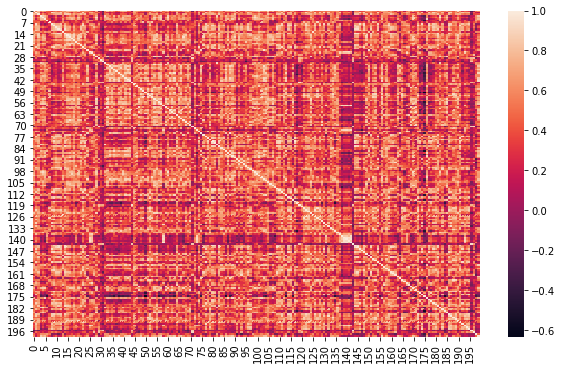

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr2)

In [38]:
user_movie_rating.head()

item,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
movie_title_list[10]

'1007'

In [39]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
example = movie_title_list.index('10')

In [40]:
corr_example  = corr[example]
list(movie_title[(corr_example >= 0.9)])[:10]

['10', '1005', '1404', '1448', '1462', '16', '18', '20', '207', '212']